In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [12]:
df.shape

(1000, 3)

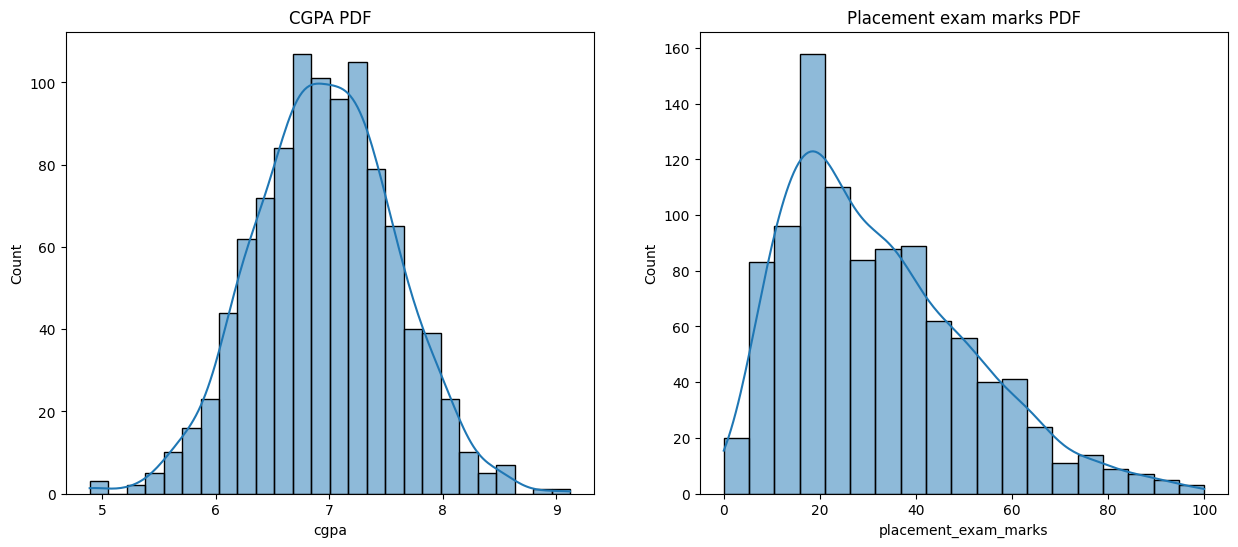

In [6]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True)
plt.title("CGPA PDF")

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True)
plt.title("Placement exam marks PDF")

plt.show()

### **Z score can be applied on CGPA as its normally distributed**

In [7]:
print("Mean value of CGPA:", df['cgpa'].mean())
print("Std value of CGPA:", df['cgpa'].std())
print("Min value of CGPA:", df['cgpa'].min())
print("Max value of CGPA:", df['cgpa'].max())

Mean value of CGPA: 6.96124
Std value of CGPA: 0.6158978751323896
Min value of CGPA: 4.89
Max value of CGPA: 9.12


### Find boundary values

In [8]:
print("Highest allowed:", df['cgpa'].mean() + 3 * df['cgpa'].std())
print("Lowest allowed:", df['cgpa'].mean() - 3 * df['cgpa'].std())

Highest allowed: 8.808933625397168
Lowest allowed: 5.113546374602832


### Finding outliers

In [10]:
df[(df['cgpa'] > 8.8089) | (df['cgpa'] < 5.1135)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### Trimming

In [11]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [13]:
new_df.shape

(995, 3)

### Alternative approach

In [15]:
# Calculating Z-score
df['cgpa_z_score'] = ((df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std())
df.head()

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


- Only rows having Z score between -3 to 3 are acceptable

In [17]:
df[df['cgpa_z_score'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_z_score
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [18]:
df[df['cgpa_z_score'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_z_score
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [21]:
# Trimming
new_df = df[(df['cgpa_z_score'] > -3) & (df['cgpa_z_score'] < 3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


## Capping

In [23]:
upper_limit = df['cgpa'].mean() + 3 * df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3 * df['cgpa'].std()

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: 5.113546374602832
Upper Limit: 8.808933625397168


In [26]:
df['cgpa'] = np.where(df['cgpa'] < lower_limit, lower_limit, df['cgpa'])
df['cgpa'] = np.where(df['cgpa'] > upper_limit, upper_limit, df['cgpa'])

## alternative code for above operation
df['cgpa'] = np.where(df['cgpa'] > upper_limit, upper_limit, np.where(df['cgpa'] < lower_limit, lower_limit, df['cgpa']))

In [27]:
print("Max:", df['cgpa'].max())
print("Min:", df['cgpa'].min())

Max: 8.808933625397168
Min: 5.113546374602832


In [28]:
df.describe()

,cgpa,placement_exam_marks,placed,cgpa_z_score
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.465494e-16
std,0.612688,19.130822,0.500129,1.000000e+00
min,5.113546,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,8.808934,100.000000,1.000000,3.505062e+00
